# Plotting Rules of Thumb
## Always
- Label Axes
- Have a caption
- Use available space
- Time on x-axis
- < 6 colours
- Maintain scales
- Consolidate Information
- Accomadate colour blindness

## Never
- Small font < 10pt
- Imply continuity (w/o tests)
- Use colours of the same hue

# 7.4 Lecture 1
## Visualization
- Diagnostics
- Exploratory analysis
- Summarisation
- Findings:
    - justification
    - explanation
    - description 

### Objectives
- Explain, illustrate, communicate
- Analyse, explore, discover 
- Present large amounts of data succintly

### 3D vs 2D

### Category Separation
### Second Y-axis

### Tests of Normality
- assume data normally distributed
- compute parameters of the normal distribution (mean and variance)
- How can we be sure the sample was drawn from a Gaussian?
- QQ-Plot
    - points will follow a line quantile-for-quantile
    - S-shape is indication of non-normality

### Correlation Matrix
- Help to discover groups or batches of correlated data

### Histogram and Density Estimates
- Kernal Density Estimates 
    - Puts a small specific distribution (kernal) centered at every point and sums 
    - Bandwidth: the variance of the kernal
        - Higher the variance => smoother relusting density estimate
   


In [4]:
import pandas as pd 
df = pd.read_csv('./IRIS.csv')

In [5]:
df.head()
# df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
import matplotlib.pyplot as plt 
%matplotlib inline

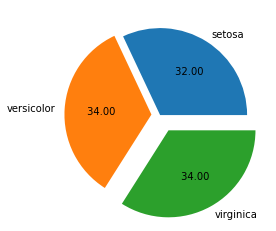

In [7]:
# both get the job done
# species = sorted(list(df['species'].unique()))
species = sorted(list(set(df['species'])))
species

# get counts
counts = [df.loc[df['species'] == name].size for name in species]
counts # => [160, 170, 170]
# how is this possible as there are only 100 rows of data??

# df['species'].count
# list(sorted(df['species']).value_counts())
counts2 = list(df['species'].value_counts(ascending=True)) # => [32, 34, 34]

explot = (0, 0.1, 0.2)

plt.figure()

plt.pie(counts,
    explode = explot,
    labels=species,
    autopct = ' %1.2f'
    )
plt.show()


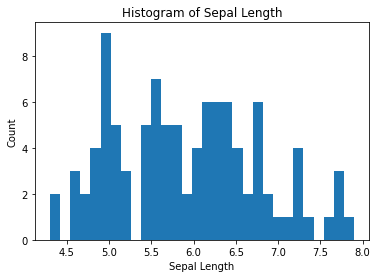

In [8]:
plt.figure()
plt.hist(df['sepal_length'], bins=30)
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Count')
plt.show()

# Seaborn Density Histogram Plots

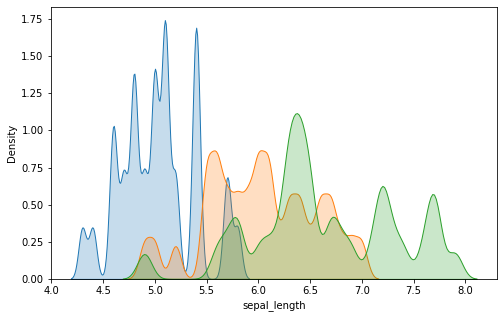

In [9]:
import seaborn as sns

plt.figure(figsize=(8,5))

for spec in species:
    data = df.loc[df['species'] == spec]
    # sns.displot(data['sepal_length'], kde=True, label=spec, kde_kws={'bw_method':.1})
    sns.kdeplot(data['sepal_length'], bw_method=0.1, fill=True)

plt.show()

# Scatter Plot

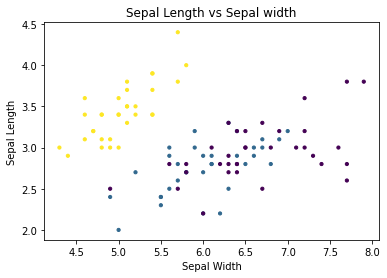

In [10]:
species_colours = {
    'setosa': 5,
    'virginica': 2,
    'versicolor': 3
}
c = [species_colours[v] for v in df['species']]

plt.figure()
plt.scatter(df['sepal_length'], 
            df['sepal_width'],
            s = 10,
            c = c
            )
plt.title('Sepal Length vs Sepal width')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')

plt.show()

# Add legend to Data

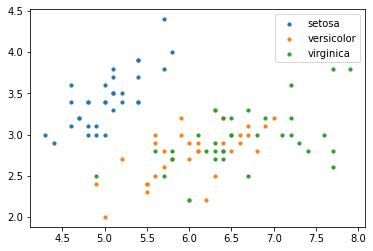

In [13]:
plt.figure()

for spec in species:
    data = df.loc[df['species'] == spec]
    plt.scatter(data['sepal_length'],
                data['sepal_width'],
                label = spec,
                s = 10,
               #  c = species_colours[spec]
                )
plt.legend()
plt.show()